In [1]:
import numpy
import pandas
import matplotlib.pylab as plt
%matplotlib inline
import seaborn
import requests
import time
import os

In [2]:
plt.rcParams['figure.figsize'] = 16, 9

In [3]:
df = pandas.read_csv('gp.csv', header=0)

In [4]:
df['h']  = pandas.to_timedelta(df['Zeit']) / numpy.timedelta64(1, 'h')

In [5]:
df['Jahr'] = [int(date.split('-')[0]) for date in df['Datum']]

In [6]:
# Read the API key from disk
# Get your own at https://darksky.net/dev/, the first 1000 forecasts per day are free.
if os.path.exists('api.key'):
    api_key=numpy.loadtxt('api.key', dtype='str')
    load_tmp=True
else:
    print('You need to get an API key from darksky.net')
    print('Go to https://darksky.net/dev/ and save the secret key into a file "api.key" in this folder')
    load_tmp=False

In [7]:
# Where is Bern
lat_bern = '46.9478'
lon_bern = '7.4490'

Grabbing weather data, [Powered by Dark Sky](https://darksky.net/poweredby/)

In [8]:
# Grab the temperature according to https://github.com/thisss/eisheilige/blob/master/eisheilige.ipynb
debug = False
if load_tmp:
    temp = [None] * len(df)
    icon = [None] * len(df)
    summary = [None] * len(df)
    for index, row in df.iterrows():
        if debug:
            print('Getting weather data for the GP of %s' % row['Datum'])
        # https://darksky.net/dev/docs/time-machine
        APIstring = row['Datum'] + \
            'T16:45:00' + \
            '?exclude=minutely,hourly,daily,alerts,flags' + \
            '&lang=de' + \
            '&units=si'
        if debug:
            print(APIstring)
        response = requests.get('https://api.darksky.net/forecast/%s/%s,%s,%s' % (api_key,
                                                                                  lat_bern,
                                                                                  lon_bern,
                                                                                  APIstring))
        data_bern = response.json()
        if debug:
            print(data_bern)
        temp[index] = data_bern['currently']['apparentTemperature']
        icon[index] = data_bern['currently']['icon']
        summary[index] = data_bern['currently']['summary']
        print(u'On %s at 16:45 it felt like %s\u00b0C. The day was "%s" or "%s"' % (row['Datum'],
                                                                                    temp[index],
                                                                                    icon[index],
                                                                                    summary[index]))
        time.sleep(1)
    df = df.assign(Temperature=temp)
    df = df.assign(Icon=icon)
    df = df.assign(Summary=summary)

On 2017-05-13 at 16:45 it felt like 18.17°C. The day was "partly-cloudy-day" or "Überwiegend bewölkt"
On 2016-05-14 at 16:45 it felt like 10.74°C. The day was "rain" or "Nieselregen"
On 2015-05-09 at 16:45 it felt like 18.33°C. The day was "clear-day" or "Heiter"
On 2014-05-10 at 16:45 it felt like 19.24°C. The day was "clear-day" or "Heiter"
On 2013-05-18 at 16:45 it felt like 18.34°C. The day was "clear-day" or "Heiter"
On 2012-05-12 at 16:45 it felt like 8.44°C. The day was "partly-cloudy-day" or "Überwiegend bewölkt"
On 2011-05-14 at 16:45 it felt like 12.34°C. The day was "partly-cloudy-day" or "Überwiegend bewölkt"
On 2010-05-22 at 16:45 it felt like 19.87°C. The day was "partly-cloudy-day" or "Leicht bewölkt"
On 2009-04-18 at 16:45 it felt like 12.96°C. The day was "partly-cloudy-day" or "Leicht bewölkt"
On 2008-05-10 at 16:45 it felt like 21.37°C. The day was "partly-cloudy-day" or "Leicht bewölkt"
On 2007-05-12 at 16:45 it felt like 19.39°C. The day was "partly-cloudy-day" or 

In [9]:
df.to_dense()

,Datum,Zeit,Link,h,Jahr,Temperature,Icon,Summary
0,2017-05-13,1:14:14,http://bern.mikatiming.de/2017/?content=detail...,1.237222,2017,18.17,partly-cloudy-day,Überwiegend bewölkt
1,2016-05-14,1:13:35,http://bern.mikatiming.de/2016/?content=detail...,1.226389,2016,10.74,rain,Nieselregen
2,2015-05-09,1:13:57,http://bern.mikatiming.de/2015/?content=detail...,1.232500,2015,18.33,clear-day,Heiter
3,2014-05-10,1:14:55,http://bern.mikatiming.de/2014/?content=detail...,1.248611,2014,19.24,clear-day,Heiter
4,2013-05-18,1:15:59,http://bern.mikatiming.de/2013/?content=detail...,1.266389,2013,18.34,clear-day,Heiter
5,2012-05-12,1:11:42,http://bern.mikatiming.de/2012/?content=detail...,1.195000,2012,8.44,partly-cloudy-day,Überwiegend bewölkt
6,2011-05-14,NaN,http://bern.mikatiming.de/2011/?content=detail...,NaN,2011,12.34,partly-cloudy-day,Überwiegend bewölkt
7,2010-05-22,NaN,NaN,NaN,2010,19.87,partly-cloudy-day,Leicht bewölkt
8,2009-04-18,1:12:39,http://bern.mikatiming.de/2009/?content=detail...,1.210833,2009,12.96,partly-cloudy-day,Leicht bewölkt
9,2008-05-10,NaN,NaN,NaN,2008,21.37,partly-cloudy-day,Leicht bewölkt


In [10]:
t_difference = df['h'].max() - df['h'].min()
print('Times varied by %s minutes and %s seconds' % (int(60 * t_difference),
                                                     int(60 * (60 * t_difference % int(60 * t_difference)))))

Times varied by 23 minutes and 34 seconds


In [11]:
tmp_difference = numpy.max(df['Temperature']) - numpy.min(df['Temperature'])
print(u'Temperatures varied by %s\u00b0' % tmp_difference)

Temperatures varied by 21.28°


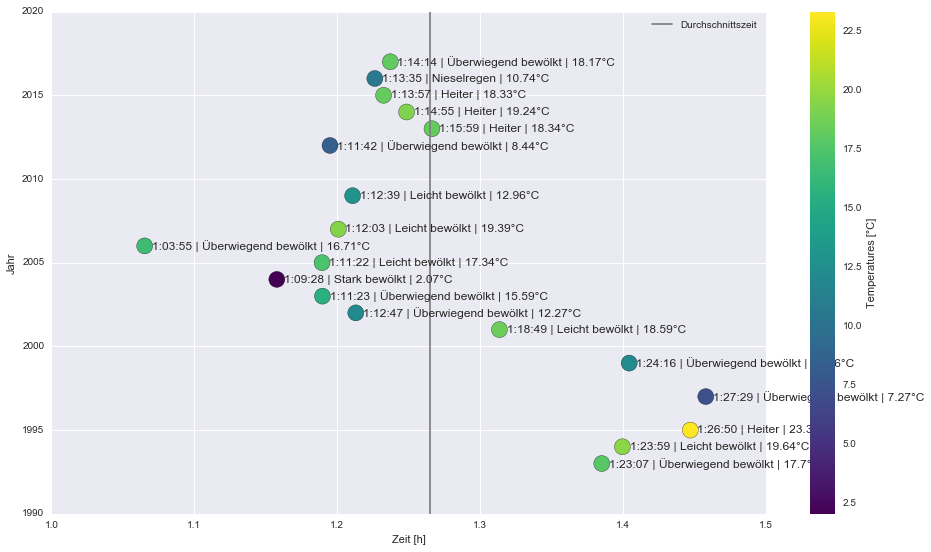

In [12]:
plt.scatter(df['h'], df['Jahr'], cmap='viridis', c=df['Temperature'], s=256, label='')
plt.axvline(numpy.nanmean(df['h']), label='Durchschnittszeit', color='gray')
for i, time in enumerate(df['Zeit']):
    # http://stackoverflow.com/a/37242674/323100
    plt.gca().annotate(u'%s | %s | %s\u00b0C' % (time,
                                                df.loc[i]['Summary'],
                                                df.loc[i]['Temperature']),
                       (df['h'][i]+0.005, df['Jahr'][i]),
                       horizontalalignment='left',
                       verticalalignment='center')
plt.colorbar(cmap='viridis', label=u'Temperatures [\u00b0C]')
plt.ylabel('Jahr')
plt.xlabel('Zeit [h]')
plt.legend(loc='best')
plt.show()

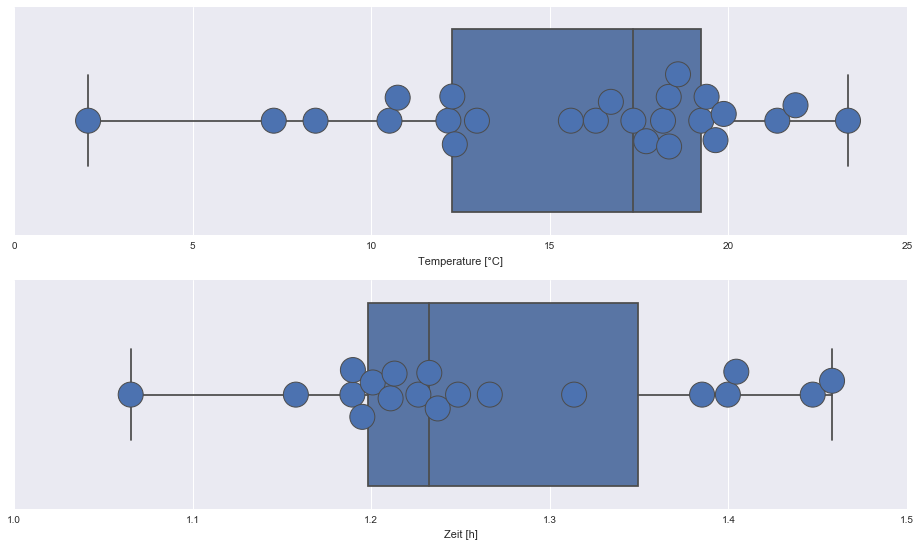

In [13]:
plt.subplot(211)
seaborn.boxplot(df['Temperature'])
seaborn.swarmplot(df['Temperature'], size=25, edgecolor='gray', linewidth=1)
plt.xlabel(u'Temperature [\u00b0C]')
plt.subplot(212)
seaborn.boxplot(df['h'])
seaborn.swarmplot(df['h'], size=25, edgecolor='gray', linewidth=1)
plt.xlabel('Zeit [h]')
plt.show()